In [1]:
from ultralytics import YOLO

## Image processing

In [2]:
# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

results = model("https://cdn.britannica.com/34/235834-050-C5843610/two-different-breeds-of-cats-side-by-side-outdoors-in-the-garden.jpg", verbose=False)

100%|██████████| 6.25M/6.25M [00:00<00:00, 43.3MB/s]


100%|██████████| 235k/235k [00:00<00:00, 11.2MB/s]



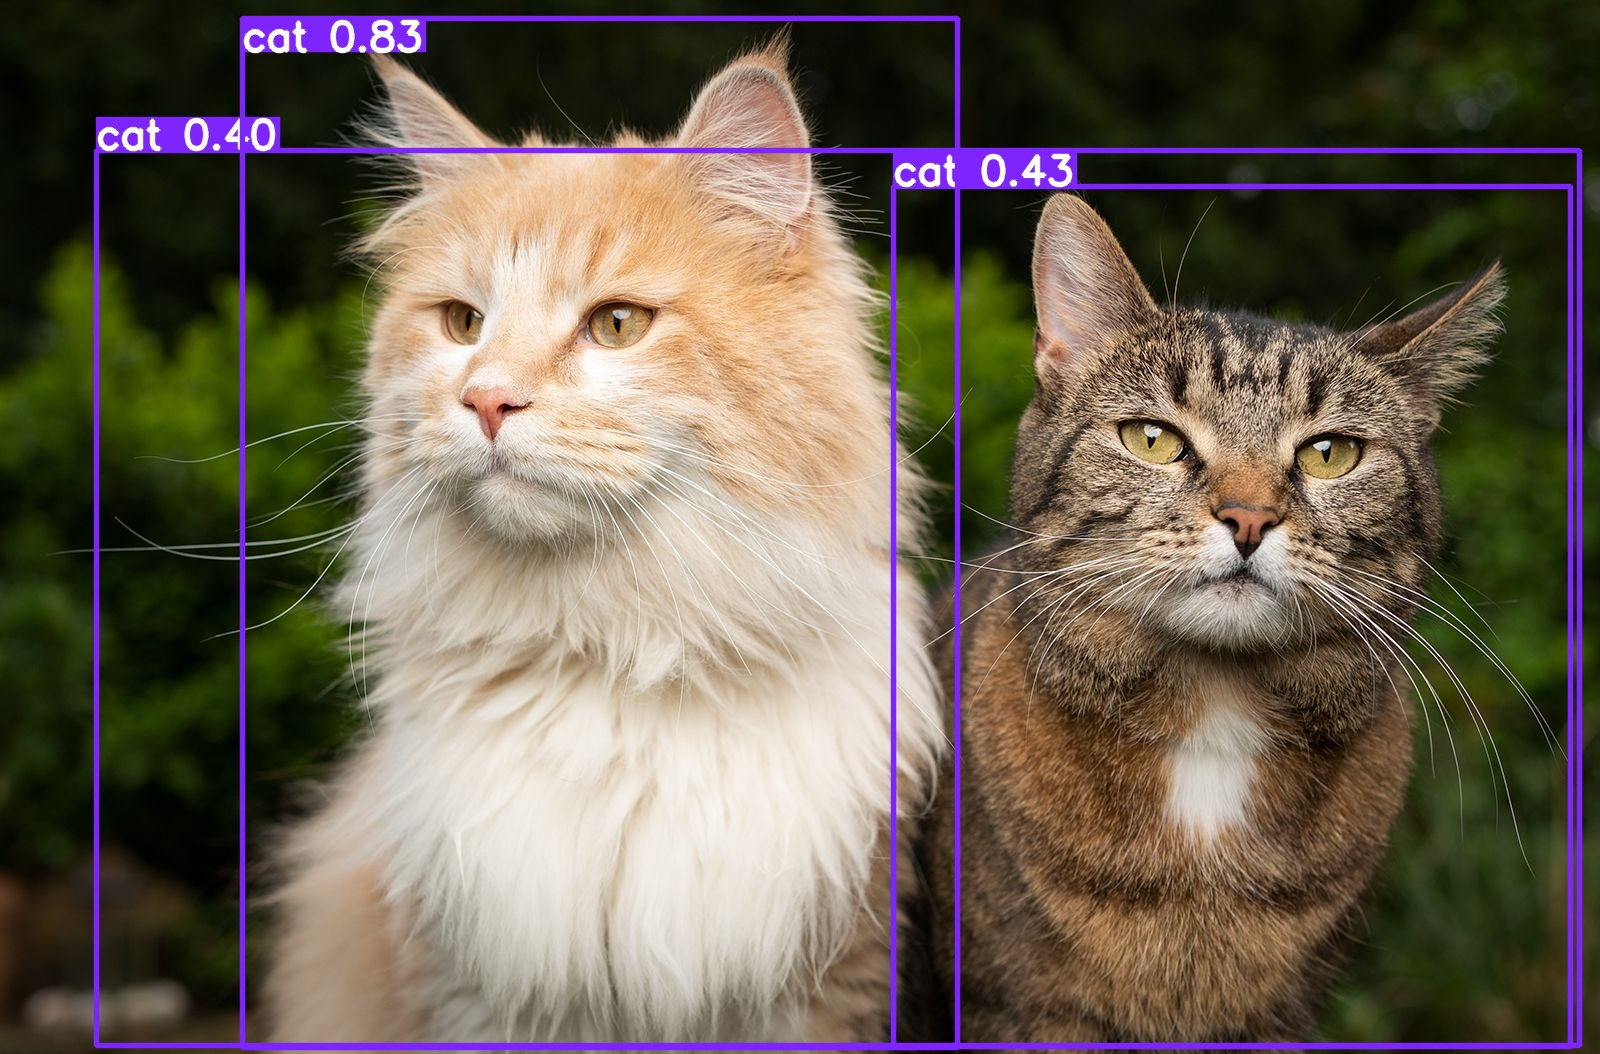

In [4]:
from visionapi import ultralytics_detections, quick_display

quick_display(results)


# Simplify data processing

In [5]:
processed_data = ultralytics_detections(results)
processed_data

[{'class': 15,
  'class_name': 'cat',
  'confidence': 0.8294557929039001,
  'bbox': [242.10464477539062,
   18.960113525390625,
   957.2537231445312,
   1047.9075927734375]},
 {'class': 15,
  'class_name': 'cat',
  'confidence': 0.43243974447250366,
  'bbox': [893.0648803710938,
   186.00364685058594,
   1570.6246337890625,
   1046.4656982421875]},
 {'class': 15,
  'class_name': 'cat',
  'confidence': 0.3961723744869232,
  'bbox': [96.64154052734375,
   150.07972717285156,
   1579.9166259765625,
   1045.916015625]}]

# Video processing and display

In [10]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model("../videos/cam0.mp4", verbose=False)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs




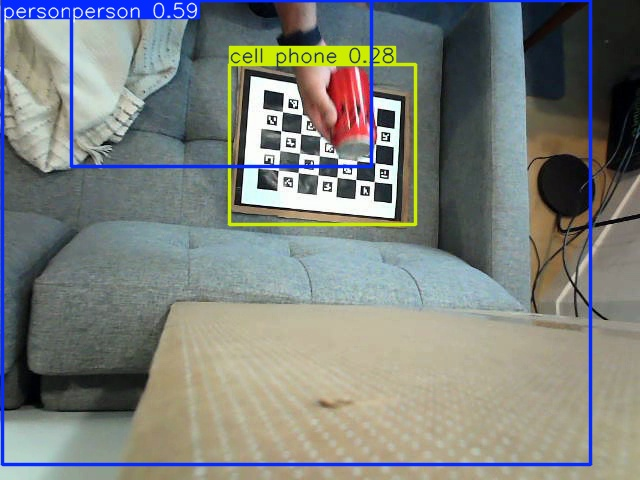

In [11]:
from visionapi import quick_display
quick_display(results)

# Render multiple videos from ultralytics

In [12]:
from ultralytics import YOLO

videos_list = ["../videos/cam0.mp4", "../videos/cam1.mp4", "../videos/cam2.mp4"]

model = YOLO("yolov8n.pt")

results = {f"camera{i}": model(video, verbose=False) for i, video in enumerate(videos_list)}



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment mas


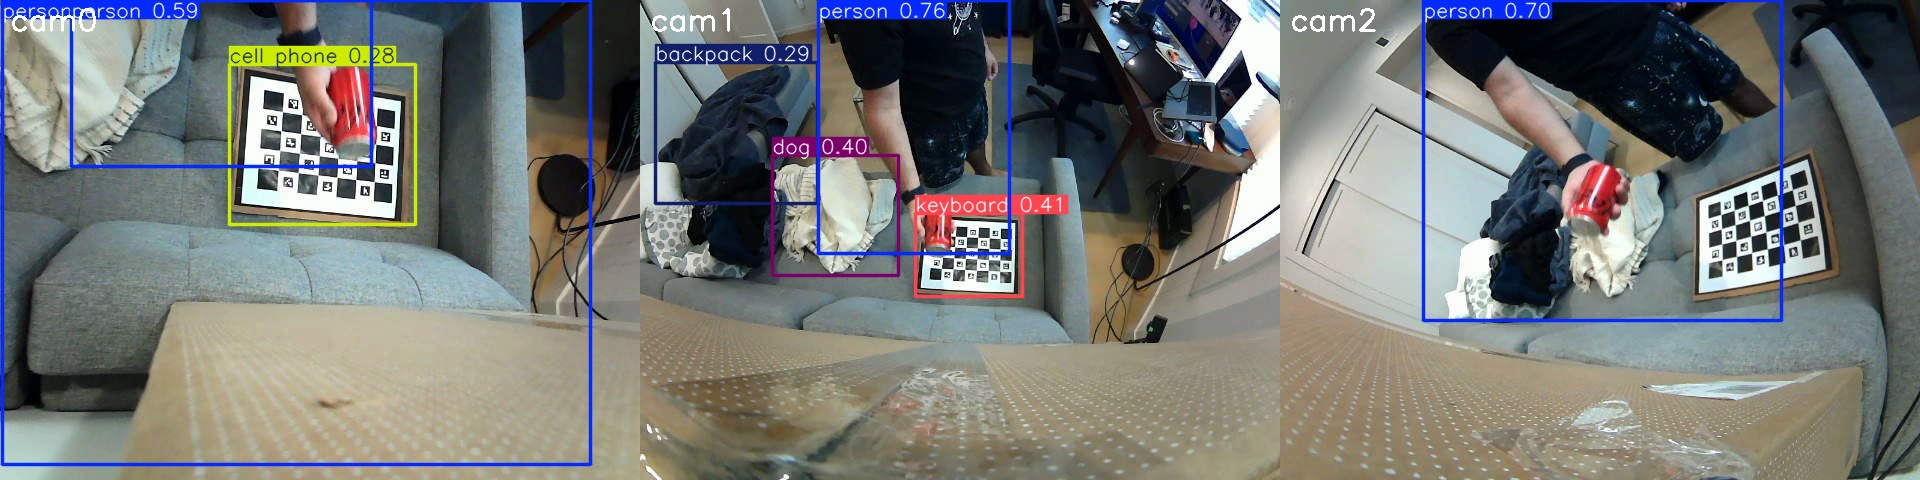

In [13]:
from visionapi import quick_display
quick_display(results, multicam=True)

## Extras

In [ ]:
!ffmpeg -i ../videos/cam0.mp4 ../videos/cam0_encoded.mp4 

from IPython.display import Video
Video('videos/cam0_encoded.mp4') 